# Hands-On NLP
## Class 1

- Getting some data

- Understanding a text corpus

  - Unicode

  - Character distributions

- The notion of words

  - Word distributions

  - Types and tokens

  - Text complexity

**Group Member      student number**
1. Junjie CHEN      22304897
2. Ying LAI         22305391

In [1]:
!pip install nltk

In [2]:
!pip install pandas

In [3]:
!pip install seaborn

In [4]:
import re
import unicodedata
from collections import Counter
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm

In [5]:
tqdm.pandas()

nltk.download("punkt")

sns.set_style("darkgrid")
sns.set_context("notebook")

pd.set_option('display.precision', 2)

[nltk_data] Downloading package punkt to /Users/yinglai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
%config InlineBackend.figure_format="retina"  # For high DPI display

# %load_ext blackcellmagic

In [15]:
#DATA = Path("data")
DATA = Path("texts")

#TEXT_P = DATA / "texts"
TEXT_P = DATA

CORPORA = [
    "mythology",
    "woodworking",
    "robotics",
    "hsm",
    "health",
    "portuguese",
]

EPS = np.finfo(float).eps

In [16]:
TEXT_P.mkdir(exist_ok=True)

# Getting some data

- If you have already downloaded the preprocessed "texts" folder, skip this, if not uncomment

- If you don't know how to use *git*, *conda* or *pip* inside of the notebook, learn it *now*

In [ ]:
# !git clone https://github.com/EleutherAI/stackexchange_dataset/
# # %cd stackexchange_dataset
# # %pwd
# # !pip install -r requirements.txt

# !conda create -n honlp python=3.9
# !conda activate honlp
# !conda config --env --add channels conda-forge\n\n
# !conda update --all
# !conda install ipykernel pandas seaborn nltk ipywidgets
# !conda install bs4 lxml py7zr tqdm jsonlines zstandard ujson requests wget
# !pip install lm-dataformat
# !pip check

In [ ]:
# !python stackexchange_dataset/main.py --names \
#     mythology.stackexchange,woodworking.stackexchange,woodworking.stackexchange,
#     robotics.stackexchange,hsm.stackexchange,health.stackexchange,
#     portuguese.stackexchange

In [10]:
# pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [17]:
corpora = {}
stats = []

for corpus in tqdm(CORPORA):
    print(corpus)
    texts = []
    for fp in (TEXT_P / corpus).glob("*.txt"):
        with fp.open() as f:
            texts.append(f.read())

    corpora[corpus] = "".join(texts)

    stats.append(
        {
            "corpus": corpus,
            "files_n": len(texts),
            "chars_n": len(corpora[corpus]),
        }
    )

df = pd.DataFrame.from_records(stats, index=["corpus"])
df["text"] = [corpora[corpus] for corpus in corpora]
df

  0%|          | 0/6 [00:00<?, ?it/s]

mythology
woodworking
robotics
hsm
health
portuguese


,files_n,chars_n,text
corpus,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n..."
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic..."


In [18]:
for corpus, text in corpora.items():
    print(f"*** {corpus} ***")
    print(text[:65])

*** mythology ***
Q:

Can anyone identify what Chinese mythology creature this is?

*** woodworking ***
Q:

Glue-up for butcher block-style countertop

Background
I am w
*** robotics ***
Q:

How is this torque value arrived?

I'm going through this per
*** hsm ***
Q:

When and why did people stopped using "natural philosophy" te
*** health ***
Q:

Help reading an eyeglass prescription: What does "PL" or "PC"
*** portuguese ***
Q:

Qual a origem da expressão "o fim da picada"?

Se, em geral, 


# Visualizing the corpus

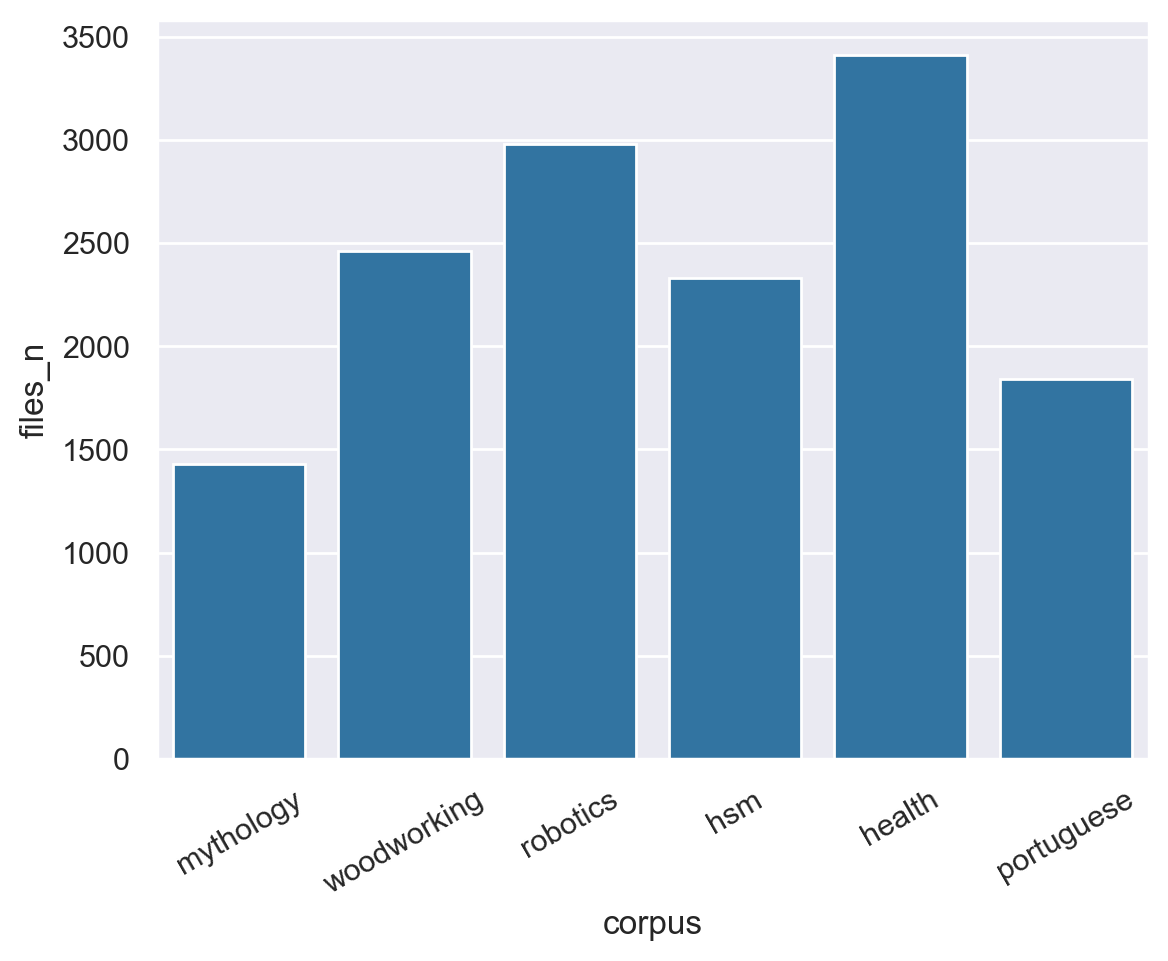

In [19]:
sns.barplot(x=df.index, y="files_n", data=df)
plt.xticks(rotation=30)
plt.show()

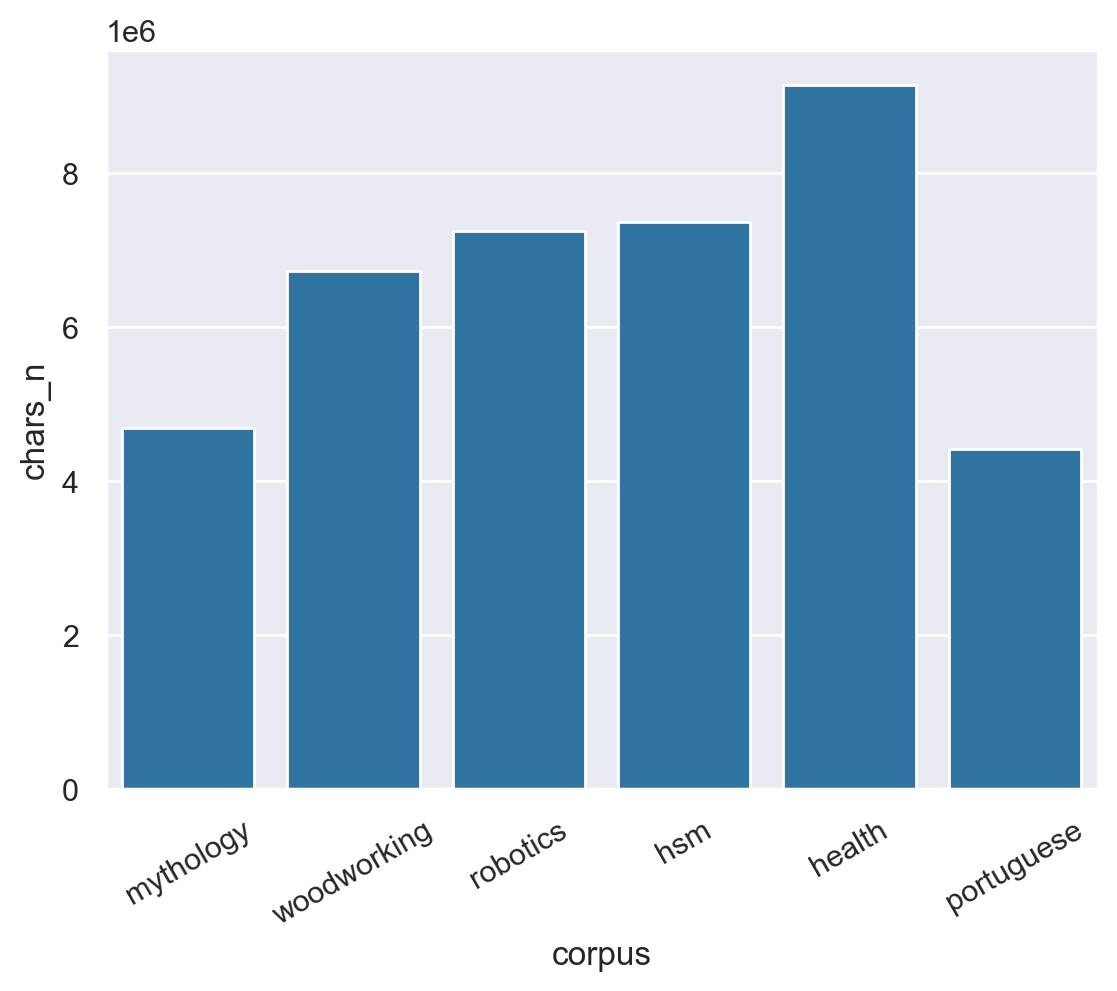

In [20]:
sns.barplot(x=df.index, y="chars_n", data=df)
plt.xticks(rotation=30)
plt.show()

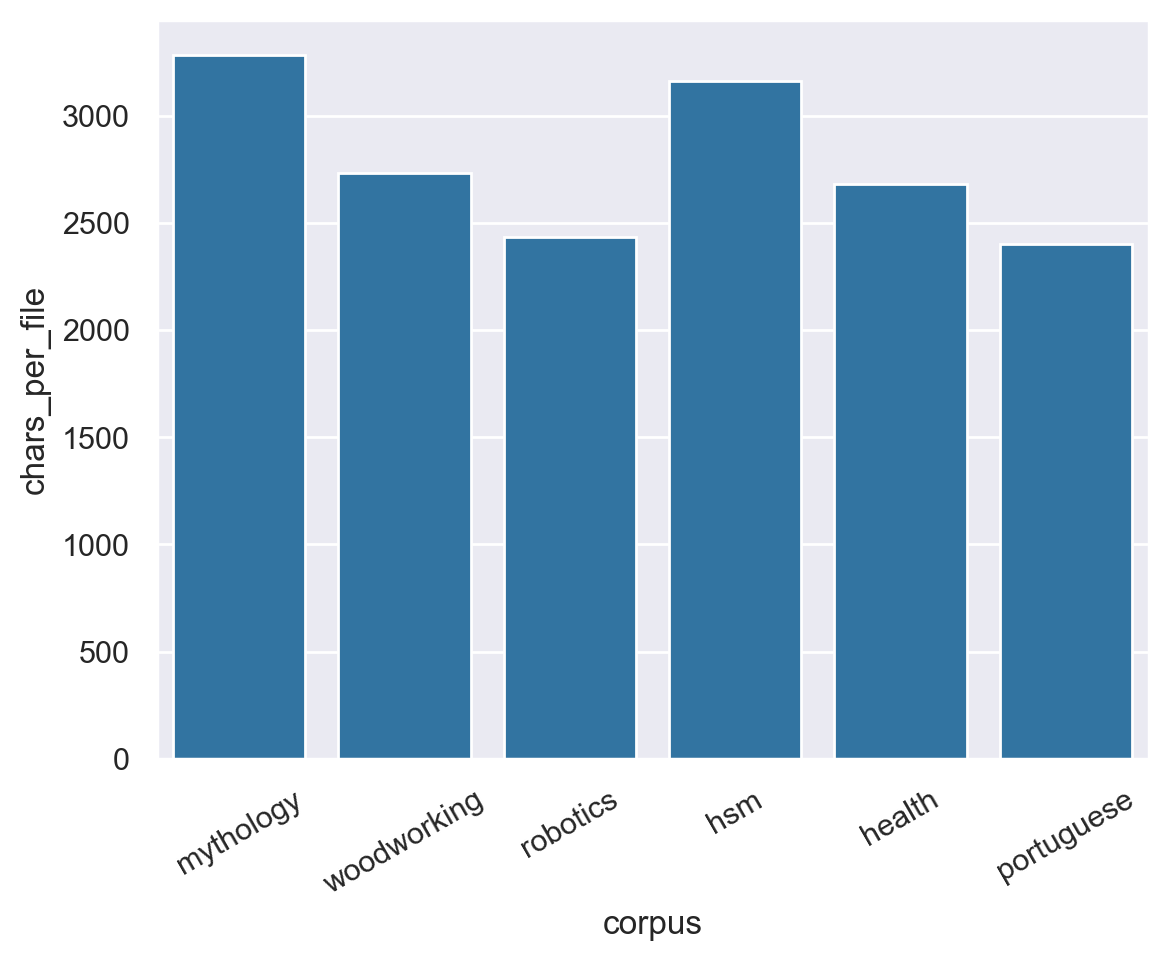

In [21]:
df["chars_per_file"] = df.chars_n / df.files_n
sns.barplot(x=df.index, y="chars_per_file", data=df)
plt.xticks(rotation=30)
plt.show()

In [22]:
char_counters = df.text.map(Counter)

print(char_counters.health)

Counter({' ': 1428190, 'e': 861733, 't': 632823, 'a': 565159, 'i': 546356, 'o': 544730, 'n': 497167, 's': 484696, 'r': 423945, 'h': 298661, 'l': 295594, 'c': 257405, 'd': 255072, 'u': 208547, 'm': 181309, 'f': 155592, 'p': 148135, 'y': 135782, 'g': 131592, 'b': 101865, '\n': 98068, 'w': 96347, '.': 83195, 'v': 80904, ',': 72317, 'k': 42048, 'I': 30666, '-': 25035, 'A': 23297, 'T': 22328, ':': 21092, '0': 20947, ')': 20097, '(': 19763, '1': 19457, 'x': 18488, 'S': 16075, '/': 15770, '2': 15348, 'C': 15331, "'": 14012, 'D': 12043, '?': 10573, 'H': 9790, 'M': 9623, 'P': 9573, '"': 9515, 'R': 8196, 'q': 7768, '3': 7653, '5': 7437, 'W': 7370, 'B': 7203, '9': 7147, 'O': 7116, 'E': 7058, 'N': 6760, 'F': 6620, 'z': 6278, 'j': 6113, '4': 5863, '6': 5305, '8': 4810, 'V': 4775, 'L': 4736, '7': 4692, 'Q': 3892, 'G': 3694, 'U': 3377, '%': 3032, ';': 2444, 'J': 2320, 'Y': 2267, 'K': 1731, ']': 1492, '[': 1490, '’': 1136, '–': 1121, '=': 1110, '_': 962, '&': 887, '“': 690, '”': 684, '!': 587, '+': 58

In [23]:
df["char_types_n"] = char_counters.map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437


### Note:
- space 
  - '\u200c' '\u200e' '\u3000' '\xa0' ???
- ascii
- other letters
  - diacritics: ĕ Ł 
- other characters
  - other languages 茶 Ꝣ  ी が
  - symbols €
  - graphical symbols ■
  - emoji ✅ 🤗
- punctuation
  - , ! ≫ '\xad'


In [24]:
# new in 2021: ⃀ (Kyrgyzstani som)
#   (see also https://www.unicode.org/emoji/charts-14.0/emoji-released.html)

for ch in "ĕŁ茶Ꝣीが€,!≫■✅🤗\u200c":
    print(unicodedata.category(ch), ":::", unicodedata.name(ch))

Ll ::: LATIN SMALL LETTER E WITH BREVE
Lu ::: LATIN CAPITAL LETTER L WITH STROKE
Lo ::: CJK UNIFIED IDEOGRAPH-8336
Lu ::: LATIN CAPITAL LETTER VISIGOTHIC Z
Mc ::: DEVANAGARI VOWEL SIGN II
Lo ::: HIRAGANA LETTER GA
Sc ::: EURO SIGN
Po ::: COMMA
Po ::: EXCLAMATION MARK
Sm ::: MUCH GREATER-THAN
So ::: BLACK SQUARE
So ::: WHITE HEAVY CHECK MARK
So ::: HUGGING FACE
Cf ::: ZERO WIDTH NON-JOINER


In [25]:
myth_char_freq_df = pd.DataFrame.from_dict(
    char_counters.mythology, orient="index", columns=["freq"]
)
myth_char_freq_df.sort_values("freq", inplace=True, ascending=False)
myth_char_freq_df.index.name = "char"
myth_char_freq_df

,freq
char,
,783629
e,447804
t,312204
a,287794
o,273780
...,...
抱,1
還,1
Ø,1


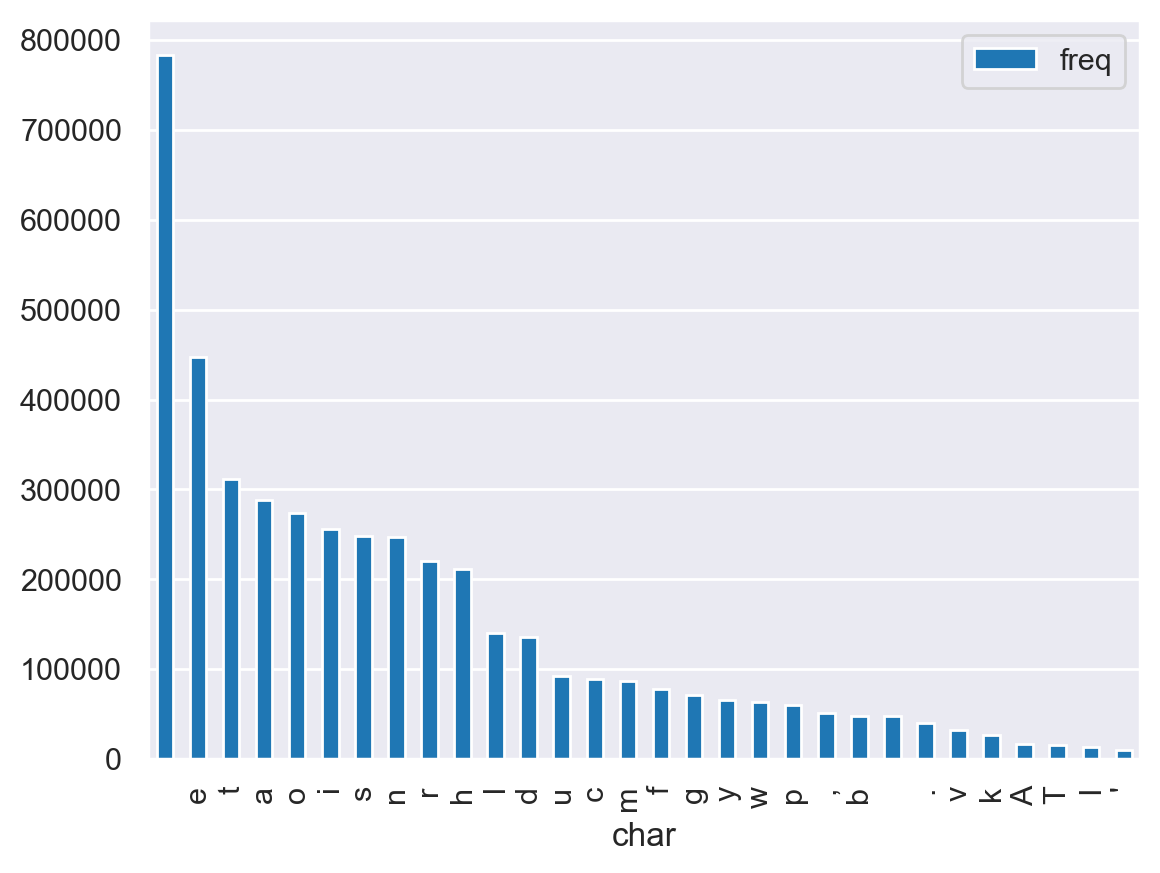

In [26]:
myth_char_freq_df.head(30).plot(kind="bar")
plt.grid(axis="x")
plt.show()

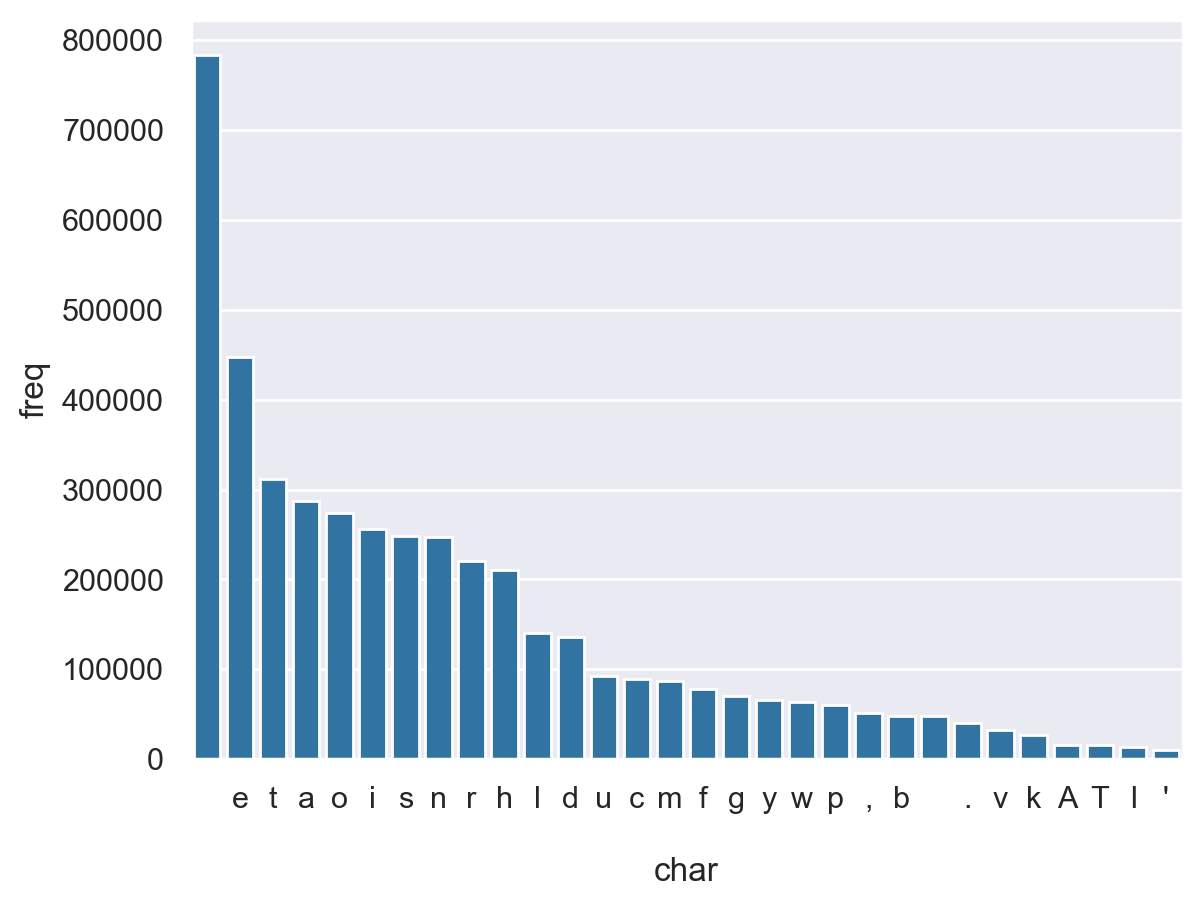

In [27]:
sns.barplot(
    x=myth_char_freq_df.head(30).index,
    y="freq",
    data=myth_char_freq_df.head(30),
)
plt.show()

/Users/yinglai/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


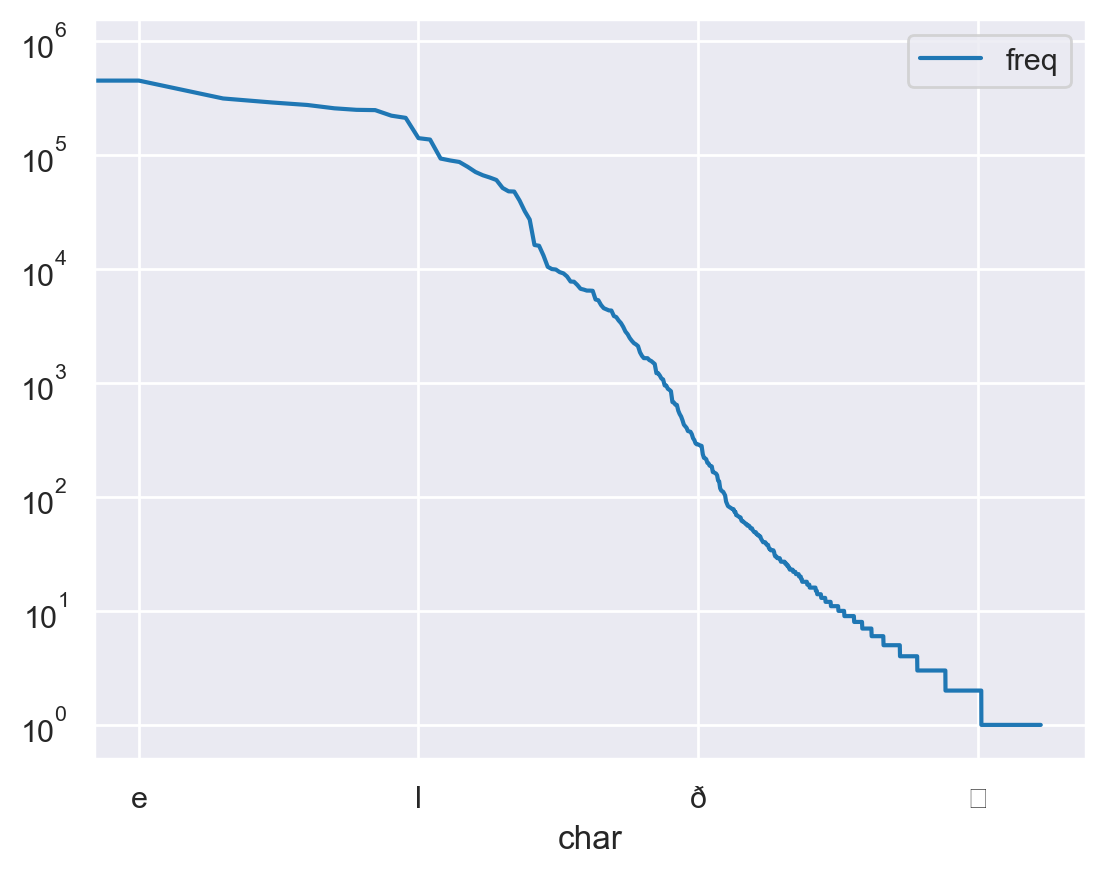

In [28]:
myth_char_freq_df.plot(loglog=True)
plt.show()

In [29]:
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437


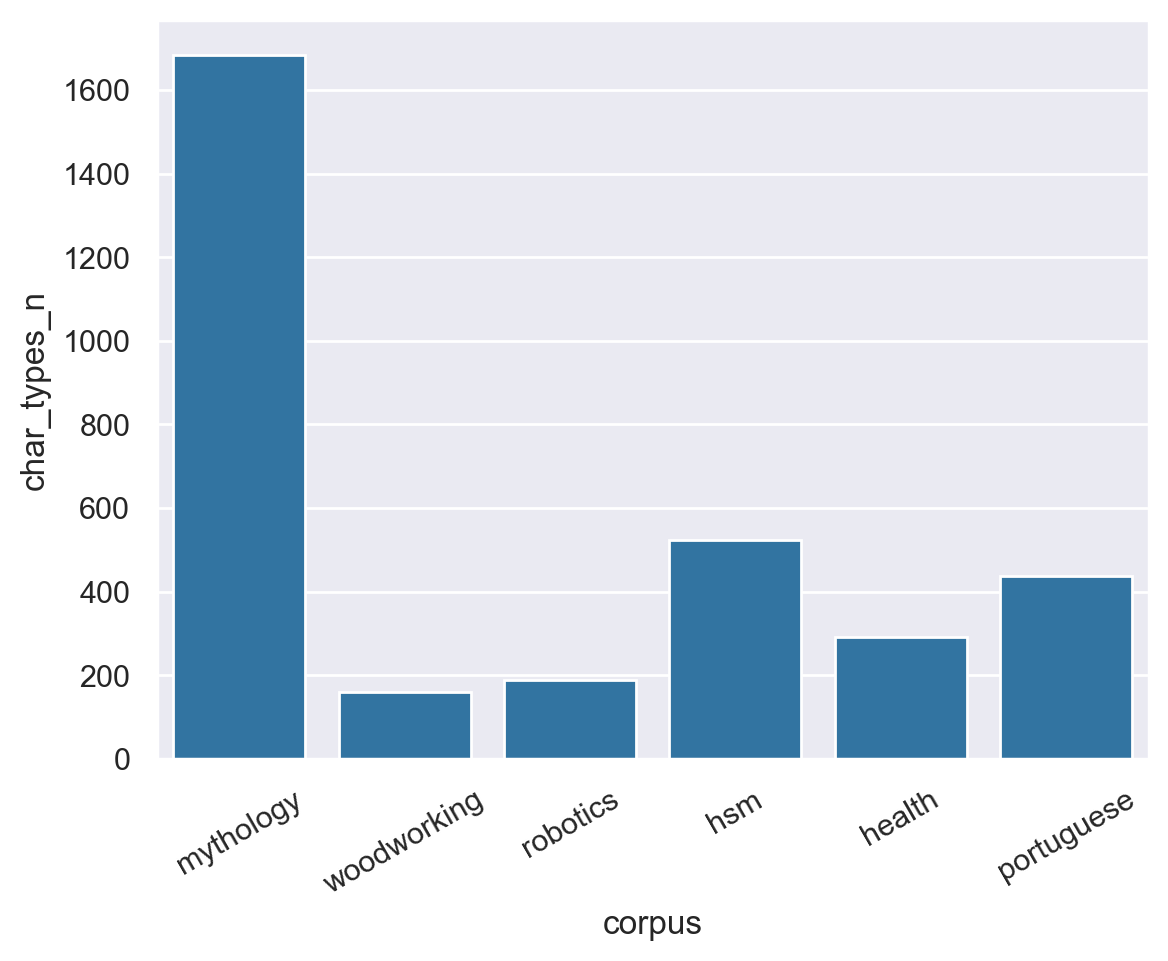

In [30]:
sns.barplot(x=df.index, y="char_types_n", data=df)
plt.xticks(rotation=30)
plt.show()

#### how to compute richness in characters?

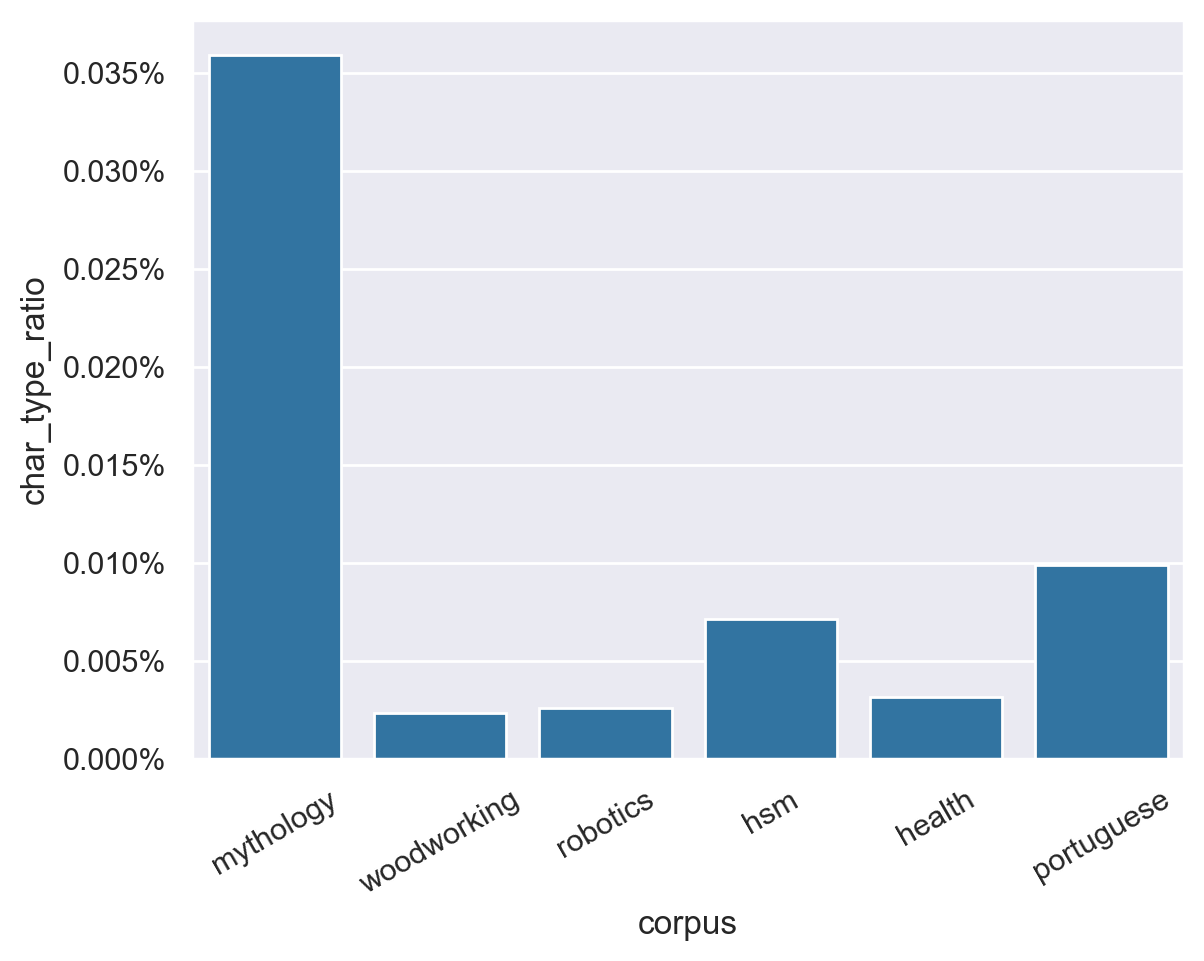

In [31]:
df["char_type_ratio"] = df.char_types_n / df.chars_n
ax = sns.barplot(x=df.index, y="char_type_ratio", data=df)
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=3))
plt.xticks(rotation=30)
plt.show()

In [32]:
char_counters = df.text.map(lambda x: Counter(x[:1000]))
print(char_counters.health)
df["type_chars_1000"] = char_counters.map(len)

Counter({' ': 151, 'e': 80, 'i': 67, 't': 66, 'o': 64, 'a': 57, 'n': 54, 's': 49, 'r': 48, 'l': 33, 'h': 29, 'c': 27, 'f': 23, '\n': 22, 'd': 22, 'g': 21, 'y': 18, 'u': 17, 'p': 13, 'm': 13, 'b': 10, '.': 9, 'w': 8, ':': 6, '9': 6, 'P': 5, 'S': 5, 'v': 5, ',': 5, '"': 4, '(': 4, ')': 4, 'T': 4, '0': 4, '1': 4, 'W': 3, 'L': 3, 'I': 3, 'A': 3, '-': 3, 'k': 3, '7': 3, 'Q': 2, 'H': 2, 'C': 2, '?': 2, "'": 2, 'R': 2, 'E': 2, 'O': 1, 'Y': 1, 'M': 1, '“': 1, '‘': 1, '’': 1, '”': 1, 'B': 1})


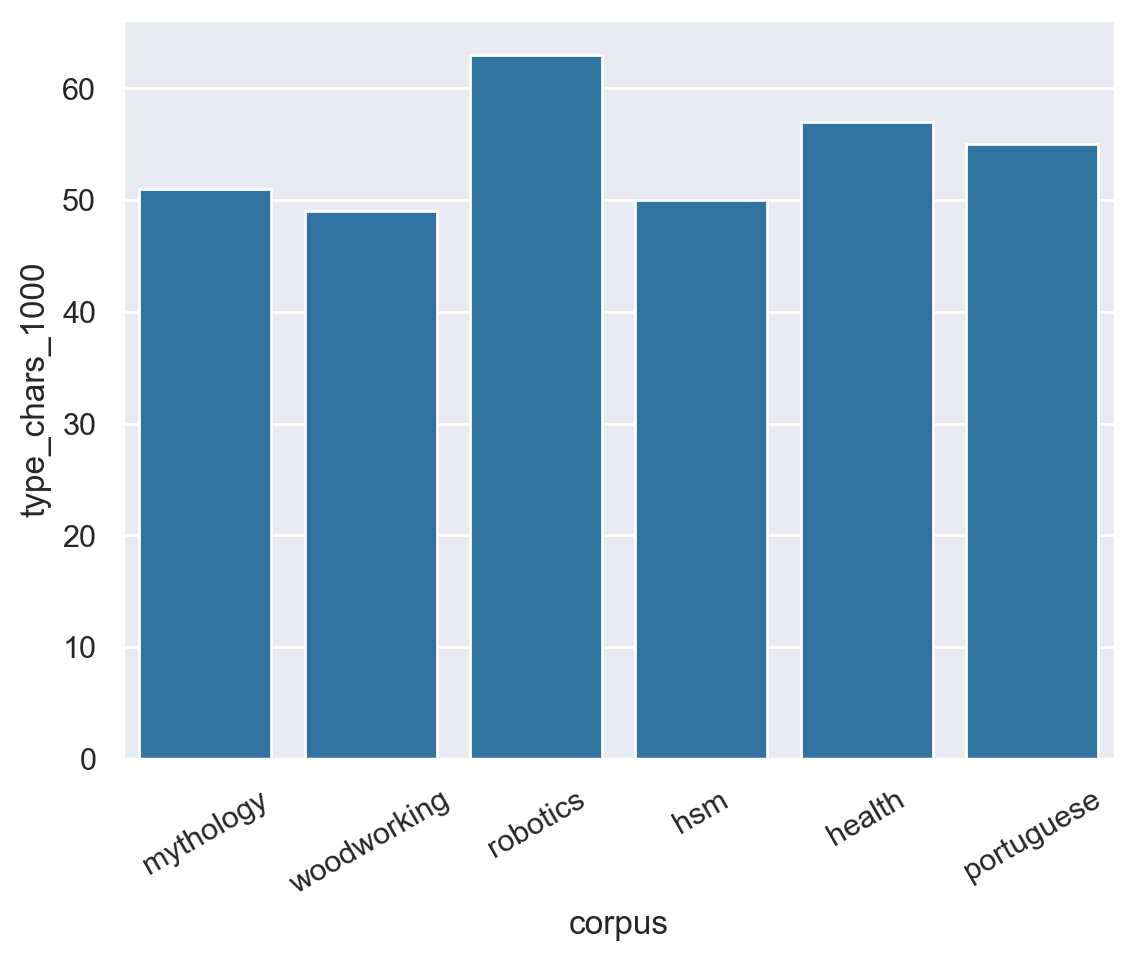

In [33]:
sns.barplot(x=df.index, y="type_chars_1000", data=df)
plt.xticks(rotation=30)
plt.show()

### What's going on here? Which text is the richest in characters?

In [34]:
HOP = 100_000

In [35]:
def batch_counts(text, max_len, hop):
    counters = [Counter()]
    for i in range(hop, max_len, hop):
        counters.append(counters[-1] + Counter(text[i - hop : i]))
    return [len(cntr) for cntr in counters]

In [36]:
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000
corpus,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189,2.61e-05,63
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524,7.12e-05,50
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291,3.18e-05,57
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437,9.90e-05,55


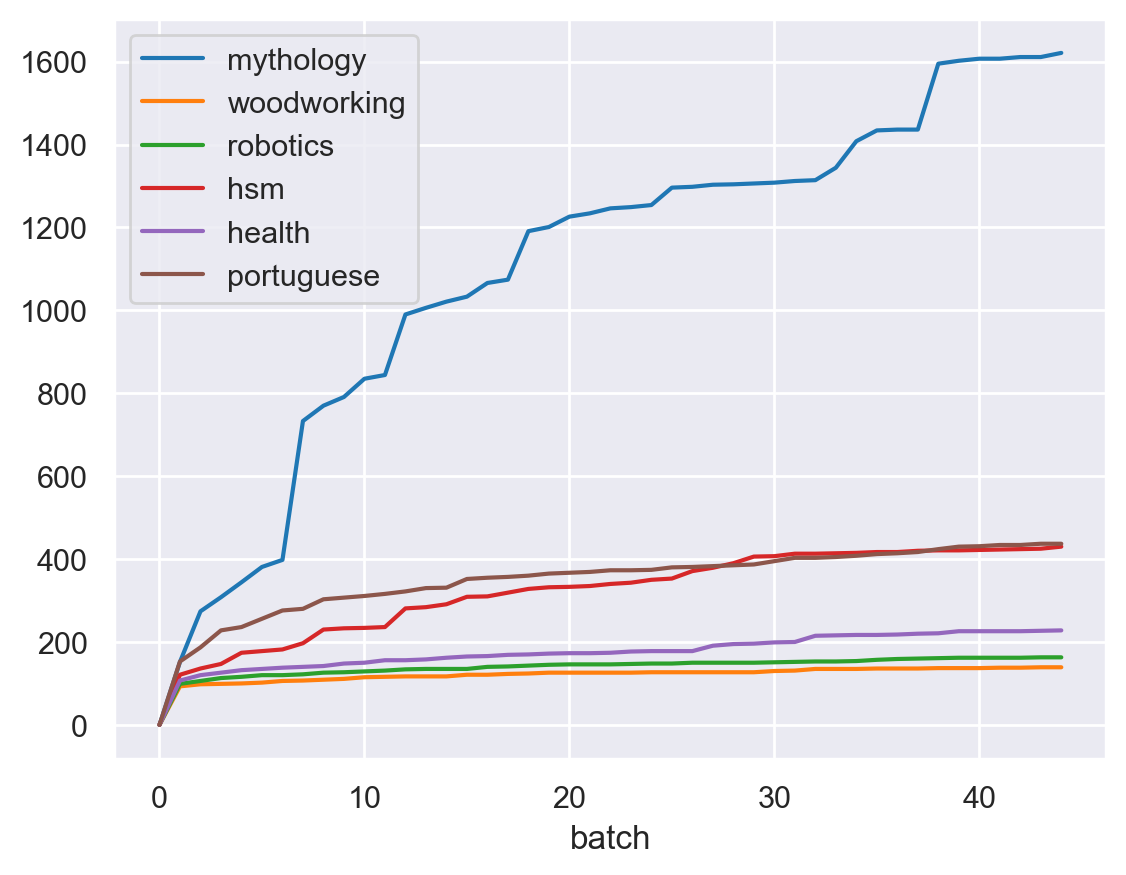

In [37]:
batch_counters = df.text.map(
    lambda x: batch_counts(x, max_len=df.chars_n.min(), hop=HOP)
)

batch_counters_df = pd.DataFrame(
    dict(zip(batch_counters.index, batch_counters.values))
)
batch_counters_df.index.name = "batch"

batch_counters_df.plot()
plt.show()

### What's happening here?
#### 🚧 TODO: Give some explanation

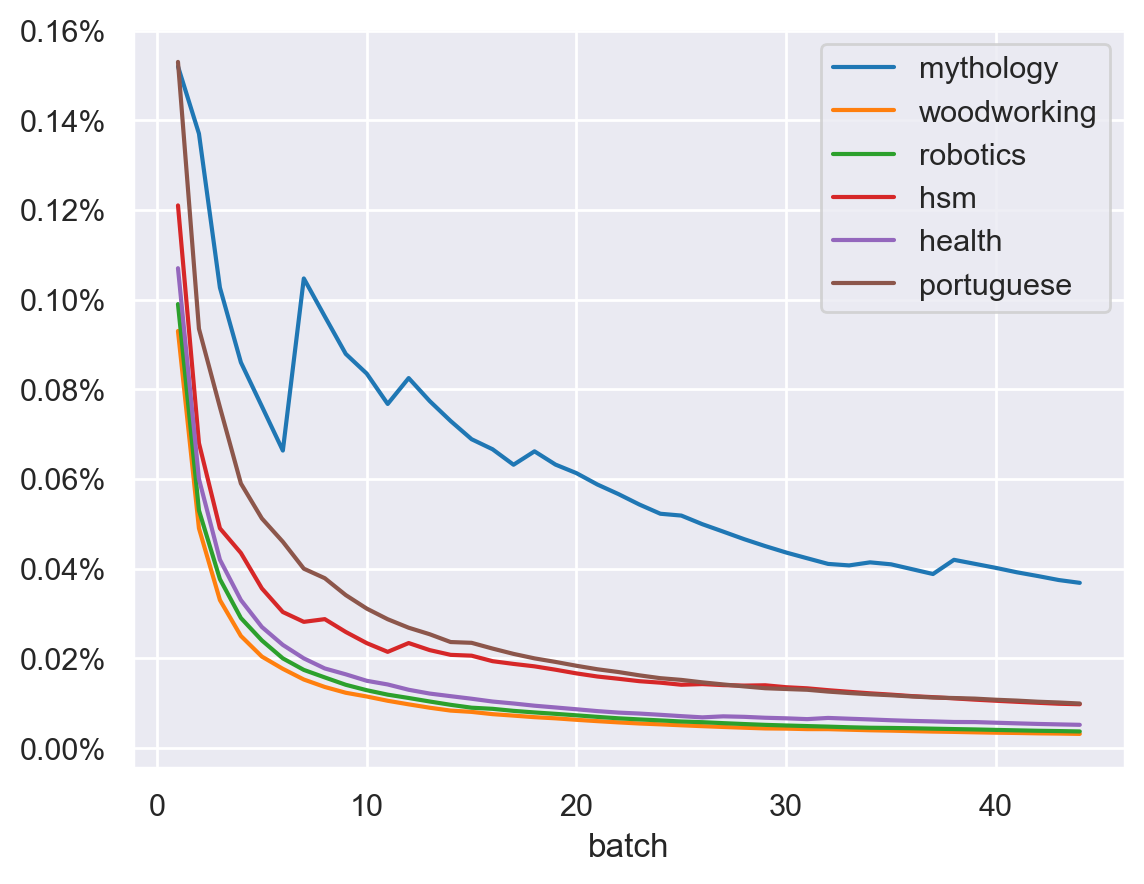

In [38]:
batches = np.arange(0, df.chars_n.min(), HOP)
batch_counters_freq_df = batch_counters_df.divide(batches, axis="index")
ax = batch_counters_freq_df.plot()
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=2))
plt.show()

# Tokens and words

### tokenizing

In [39]:
text = "Let's all together defeat last years' problem, SARS-CoV-2, in 2023!"
token_splits = text.split()

print("|".join(token_splits))
len(token_splits)

Let's|all|together|defeat|last|years'|problem,|SARS-CoV-2,|in|2023!


10

In [40]:
chars_re = re.compile(r"\W+")
token_splits = chars_re.split(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS|CoV|2|in|2023|


14

In [41]:
char_or_hyphen_re = re.compile(r"[\w-]+")
token_splits = char_or_hyphen_re.findall(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS-CoV-2|in|2023


11

Idiosyncratic rules for English!

- Think of *viens-tu*, *où va-t-il*, *Kaffeetasse*, *我爱你*...

- Can you think of other cases in your language where the tokenizer does not work? What does the tokenizer do?

**A:**
1. 'viens-tu', a French phrasal verb which involves a dash might be split into two tokens ('viens' and 'tu').
2. 'où va-t-il', also a French phrasal verb, tokenizer needs to handle its hyphenated structure.
3. 'Kaffeetasse' is a German compound word, meaning 'coffee cup'. 
4. '我爱你' is a Chinese sentence, meaning 'I love you'. Unlike English, Chinese characters don't have spaces. In the case, as far as I know, we can use some Chinese text segmentation tools, like THULAC and Jieba.
\\

The mother tougue of both of our group members is Chinese and it has been cited previously as an example.
\
When comes to abbreviations and acronyms, such as 'ASAP' short for 'as soon as possible', 'U.S.A.' meaning 'United States of America' and 'BRB' short for 'be right back', and so forth, tokenizer may seperate each letters, especially in 'U.S.A.' case.
\
Tokenizer also may not deal with some simple emoji, like ':)', ':(' and 'xD'.

### Using a specialized class: `nltk`

In [42]:
nltk_tokens = word_tokenize(text)

print("|".join(nltk_tokens))
len(nltk_tokens)

Let|'s|all|together|defeat|last|years|'|problem|,|SARS-CoV-2|,|in|2023|!


15

### Not bad. Does it work for Portuguese?

In [43]:
pt_tokens = word_tokenize(corpora["portuguese"][:333])

print("|".join(pt_tokens))
len(pt_tokens)

Q|:|Qual|a|origem|da|expressão|``|o|fim|da|picada|''|?|Se|,|em|geral|,|``|picada|''|é|uma|coisa|negativa|,|pois|remete|a|dor|e|coceira|,|como|pode|ser|que|``|o|fim|da|picada|''|seja|uma|expressão|também|negativa|?|A|:|Picada|(|Aulete|,|3|)|é|também|“|caminho|aberto|em|mata|fechada|a|golpes|de|facão|ou|foice|”|.|E|a|minha|interpretação|foi|sempre|que|o|f


83

Watch out: do = de + o

In [44]:
toks = [
    word_tokenize(text[:1_000_000]) for corpus, text in tqdm(corpora.items())
]

  0%|          | 0/6 [00:00<?, ?it/s]

In [48]:
tokens_fp = DATA / "tokens.pkl"
try:
    tokens = pd.read_pickle(tokens_fp)
except FileNotFoundError:
    tokens = df.text.progress_map(word_tokenize)
    tokens.to_pickle(tokens_fp)

In [49]:
df["tokens"] = tokens
df["tokens_n"] = df.tokens.map(len)
df["types_n"] = df.tokens.map(set).map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000,tokens,tokens_n,types_n
corpus,,,,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51,"[Q, :, Can, anyone, identify, what, Chinese, m...",942611,51243
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49,"[Q, :, Glue-up, for, butcher, block-style, cou...",1390534,32316
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189,2.61e-05,63,"[Q, :, How, is, this, torque, value, arrived, ...",1526918,53823
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524,7.12e-05,50,"[Q, :, When, and, why, did, people, stopped, u...",1445136,62465
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291,3.18e-05,57,"[Q, :, Help, reading, an, eyeglass, prescripti...",1714930,66007
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437,9.90e-05,55,"[Q, :, Qual, a, origem, da, expressão, ``, o, ...",907253,60276


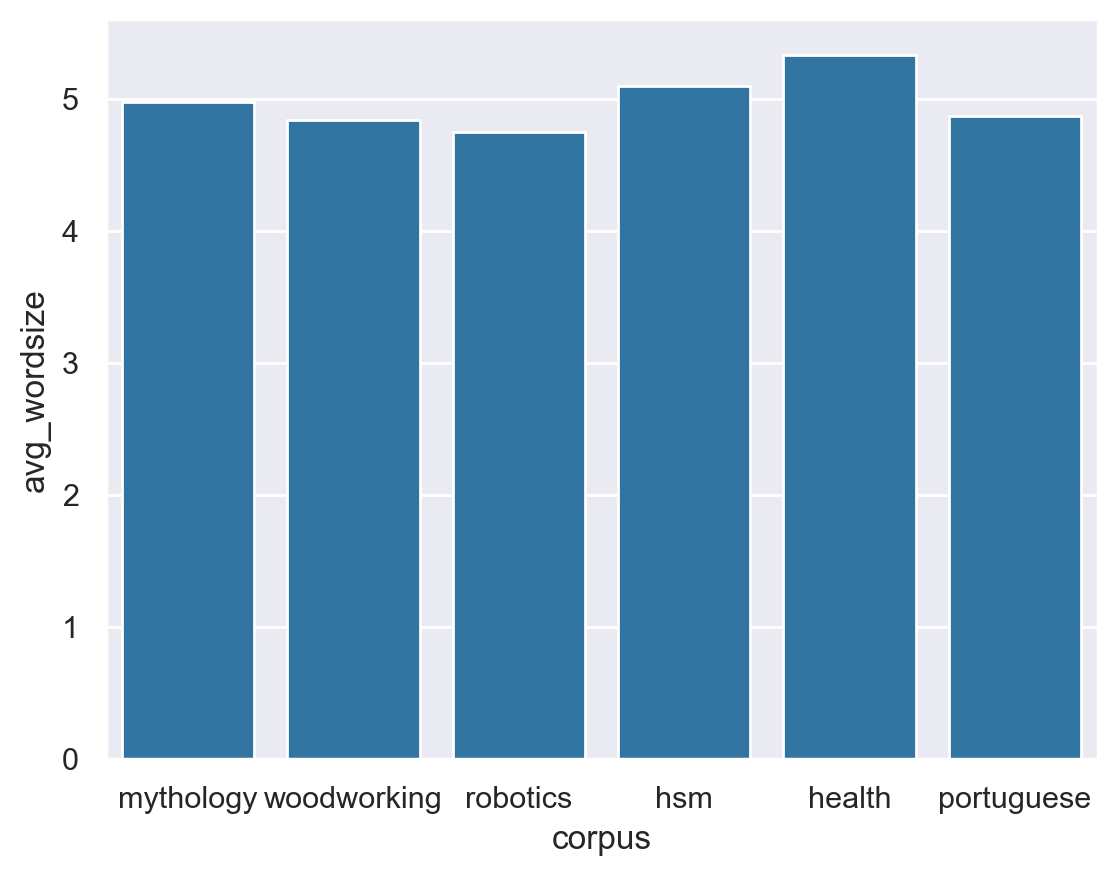

In [50]:
df["avg_wordsize"] = df.chars_n / df.tokens_n
sns.barplot(x=df.index, y="avg_wordsize", data=df)
plt.show()

In [51]:
word_ctr = Counter(df.tokens.mythology)
myth_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
myth_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
myth_tok_freq_df.index.name = "token"
myth_tok_freq_df.head()

,freq
token,
the,51133
",",51118
.,33184
of,29559
and,21018


In [52]:
word_ctr = Counter(df.tokens.woodworking)
wood_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
wood_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
wood_tok_freq_df.index.name = "token"
wood_tok_freq_df.head()

,freq
token,
the,65222
.,52199
",",41321
to,38592
a,37003


### Frequency of word length

#### 🚧 TODO

- Give the average length of tokens per corpus - clearly define what average you measure!

- Give the longest word per corpus and give their length

In [ ]:
# def avg_len_tokens(tokens):
#     ...


# def max_len_tokens(tokens):
#     ...


# def longest_words(tokens):
#     ...

In [53]:
def avg_len_tokens(tokens):
    return tokens.apply(lambda x : np.mean(list(map(lambda x : len(x),x))))

def max_len_tokens(tokens):
    return tokens.apply(lambda x : max(list(map(lambda x : len(x),x))))

def longest_words(tokens):
    return tokens.apply(lambda corpus_largest_word: corpus_largest_word[list(map(lambda x : len(x),corpus_largest_word)).index(max(list(map(lambda x : len(x),corpus_largest_word))))])


In [ ]:
# print("\n*** average length in the dictionary (on types) ***")
# display(tokens.map(avg_len_tokens))

In [54]:
print("\n*** average length in the dictionary (on types) ***")
display(avg_len_tokens(tokens))


*** average length in the dictionary (on types) ***


corpus
mythology      4.10
woodworking    3.94
robotics       3.89
hsm            4.26
health         4.45
portuguese     4.04
Name: text, dtype: float64

In [ ]:
# print("\n*** the longest words' length ***")
# display(tokens.map(max_len_tokens))

# print("\n*** the longest words ***")
# ...

In [55]:
print("\n*** the longest words' length ***")
display(max_len_tokens(tokens))

print("\n*** the longest words ***")
display(longest_words(tokens))


*** the longest words' length ***


corpus
mythology      305
woodworking    137
robotics       199
hsm            178
health         265
portuguese     125
Name: text, dtype: int64


*** the longest words ***


corpus
mythology      亮乃北行見備，備與亮非舊，又以其年少，以諸生意待之。坐集既畢，眾賓皆去，而亮獨留，備亦不問其...
woodworking    //www.hafele.com/us/en/products/furniture-kitc...
robotics       //helgewurdemann.files.wordpress.com/2014/10/e...
hsm            //www.quora.com/What-are-the-ways-to-understan...
health         //www.researchgate.net/profile/Secil_Vural/pub...
portuguese     //educacao.uol.com.br/disciplinas/cultura-bras...
Name: text, dtype: object

#### We can try to remove all non-ascii characters to get to actual long words

In [56]:
wood_tok_freq_df["len"] = wood_tok_freq_df.index.str.len()
wood_tok_filtered_df = wood_tok_freq_df[
    ~wood_tok_freq_df.index.str.contains(r"[0-9/=+\._-]")
]
wood_tok_filtered_df.sort_values(by="len", ascending=False).head(10)

,freq,len
token,,
halfdovetaillapjoints,1,21
GraphussupportsMonica,1,21
CrazyRussianWoodShop,1,20
AloysiusDefenestrate,1,20
curiouslysatisfying,1,19
CanadianWoodworking,1,19
PopularWoodworking,1,18
oversimplification,3,18
GreatPlanesTrading,1,18


- Yay! we found "disproportionately"!

#### 🚧 TODO: Let's process all corpora to get their word length distribution

In [ ]:
# def len_freq_counter(text):
#     ...


# len_freq_df = ...

In [59]:
def len_freq_counter(text):
    tokens = text
    #filter all the words including digits and special character
    filtered_tokens = {token : count for token,count in tokens.items() if not re.search(r"[0-9/=+\._-]", token)}
    if filtered_tokens:
        # find the longest length of word
        return filtered_tokens
        # get the longest word
        #longest_words = [token for token in filtered_tokens if len(token) == max_length]
        #return longest_words
    else:
        return None 

tokens2 = tokens.apply(lambda x : Counter(x)).to_frame()
#len_freq_df = tokens2.applymap(len_freq_counter).rename(columns={'text' :'freq_count'})
len_freq_df = tokens2.map(len_freq_counter).rename(columns={'text' :'freq_count'})
len_freq_df

,freq_count
corpus,
mythology,"{'Q': 1432, ':': 9089, 'Can': 60, 'anyone': 16..."
woodworking,"{'Q': 2519, ':': 10682, 'for': 12109, 'butcher..."
robotics,"{'Q': 3156, ':': 18597, 'How': 1131, 'is': 218..."
hsm,"{'Q': 2452, ':': 14297, 'When': 671, 'and': 25..."
health,"{'Q': 3437, ':': 20447, 'Help': 13, 'reading':..."
portuguese,"{'Q': 1847, ':': 14553, 'Qual': 655, 'a': 1984..."


#### 🚧 TODO: Let's plot the mythology word length distribution

In [ ]:
#myth_len_freqs = len_freq_df.mythology.sort_values(ascending=False)
#myth_len_freqs.head(5)

In [67]:
myth_len_freqs = len_freq_df.loc['mythology','freq_count']
sort_freq_count = sorted(myth_len_freqs.items(),key=lambda item: item[1], reverse=True)

myth_len_freqs = pd.DataFrame.from_dict(dict(sort_freq_count),orient='index',columns=['frequency'])
myth_len_freqs.head(5)

,frequency
the,51133
",",51118
of,29559
and,21018
to,18661


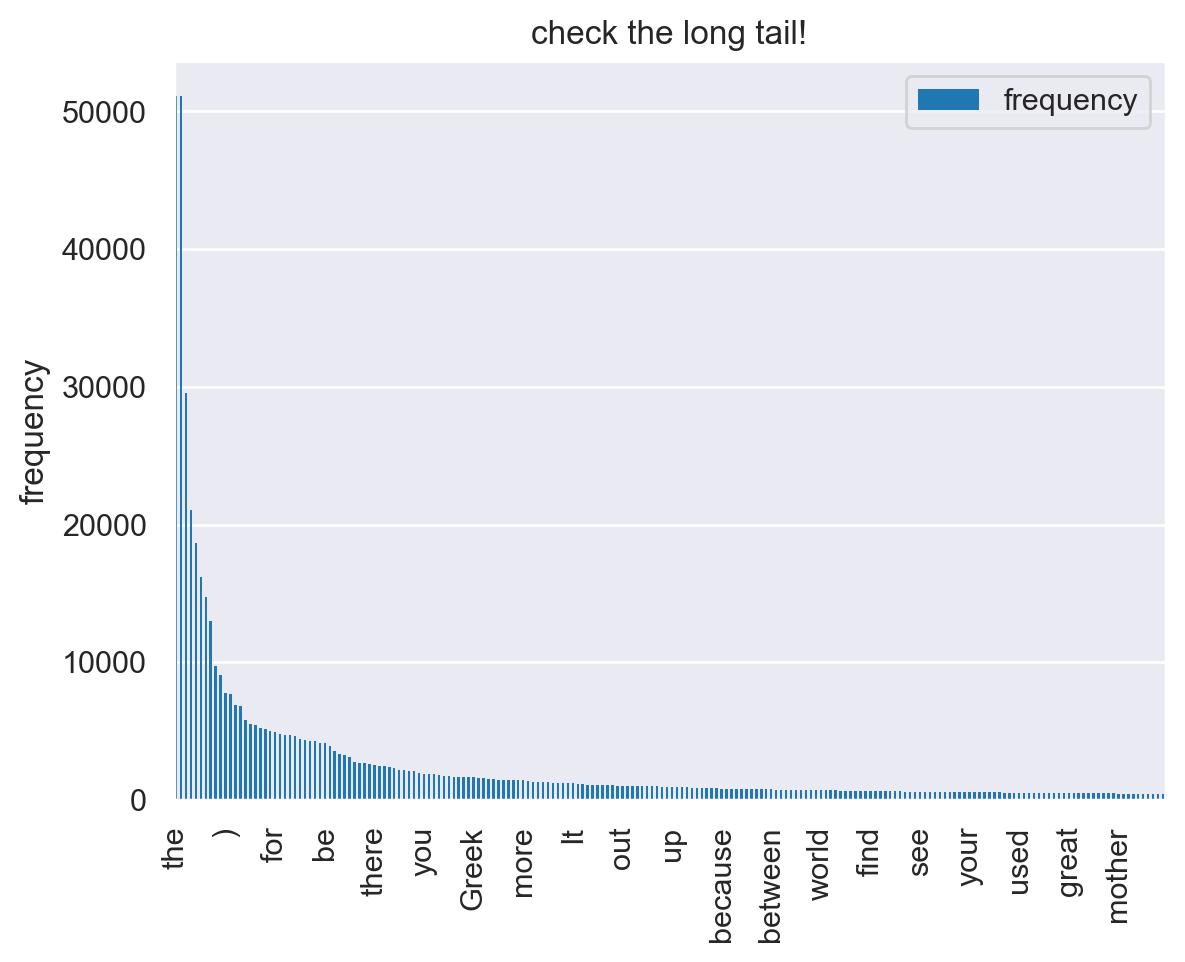

In [69]:
#Choose first 200 lines
ax = myth_len_freqs.head(200).plot.bar(title="check the long tail!", linewidth=0)

# Print only 1 x-tick-label out of 10
for i, label in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        label.set_visible(False)

plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

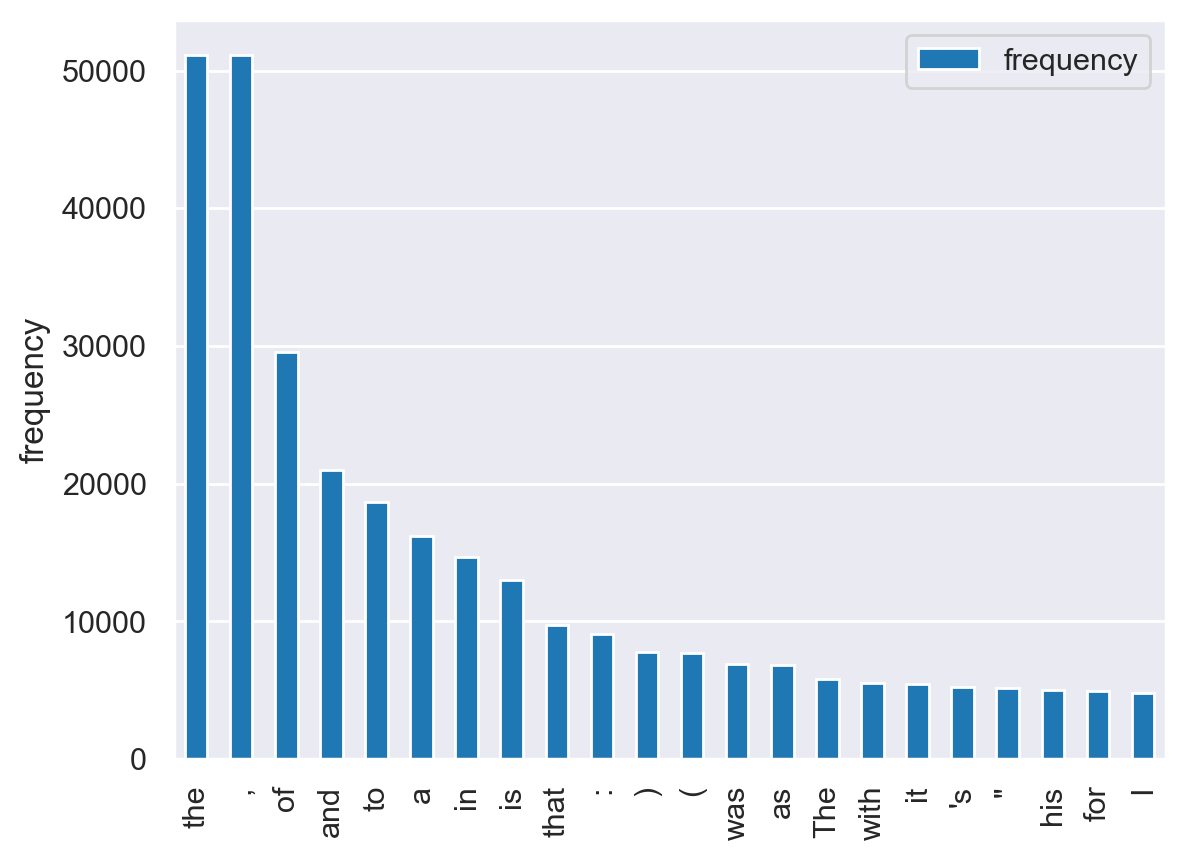

,frequency
the,51133
",",51118
of,29559
and,21018
to,18661


In [70]:
myth_len_freqs.head(22).plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

myth_len_freqs.head(5)

- If you order by token length you get a nice curve, something close to the hypergeometric distribution:

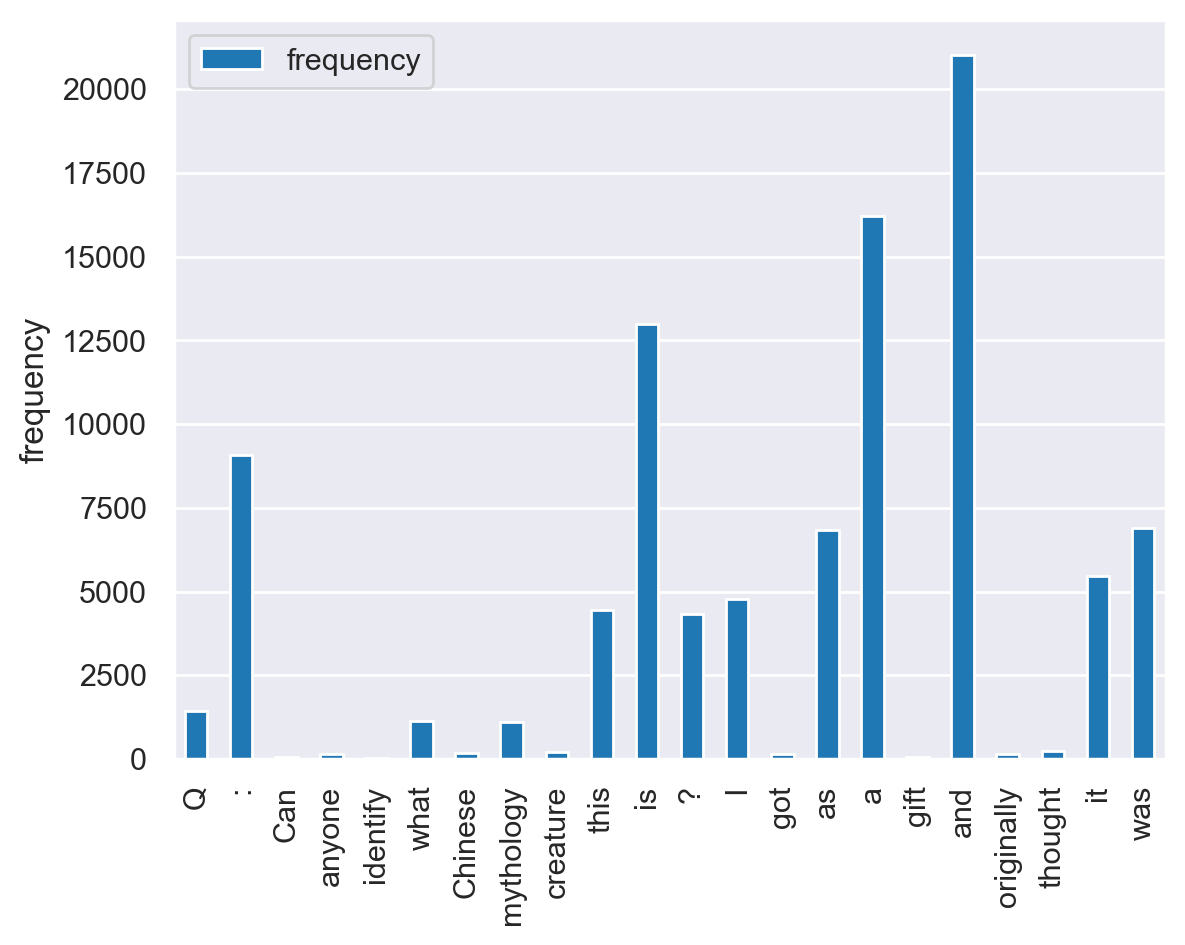

In [72]:
#len_freq_df.mythology.head(22).plot.bar()
# Since there is an AttributeError: 'DataFrame' object has no attribute 'mythology'
pd.DataFrame.from_dict(len_freq_df.loc['mythology','freq_count'],orient='index',columns=['frequency']).head(22).plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

# 💥 Let's Zipf token frequencies!

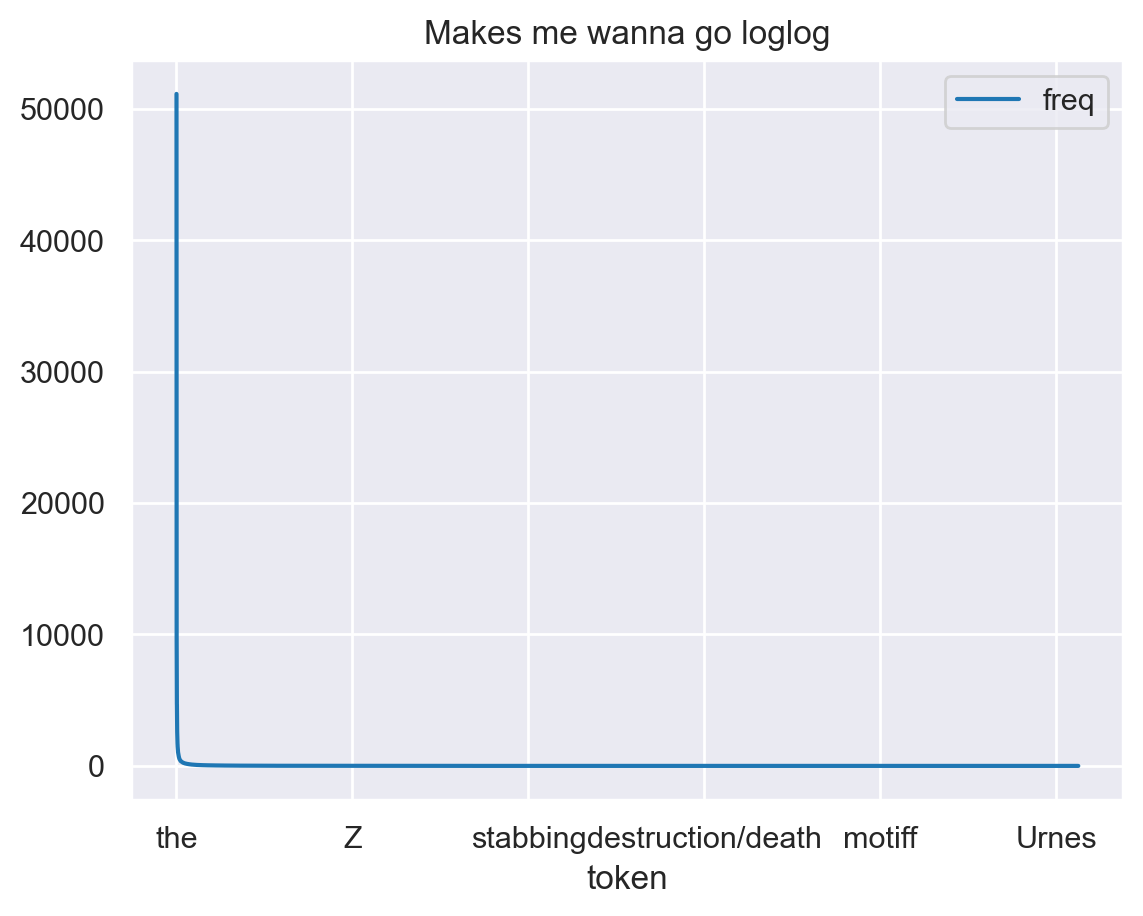

In [73]:
myth_tok_freq_df.plot(title="Makes me wanna go loglog")
plt.show()

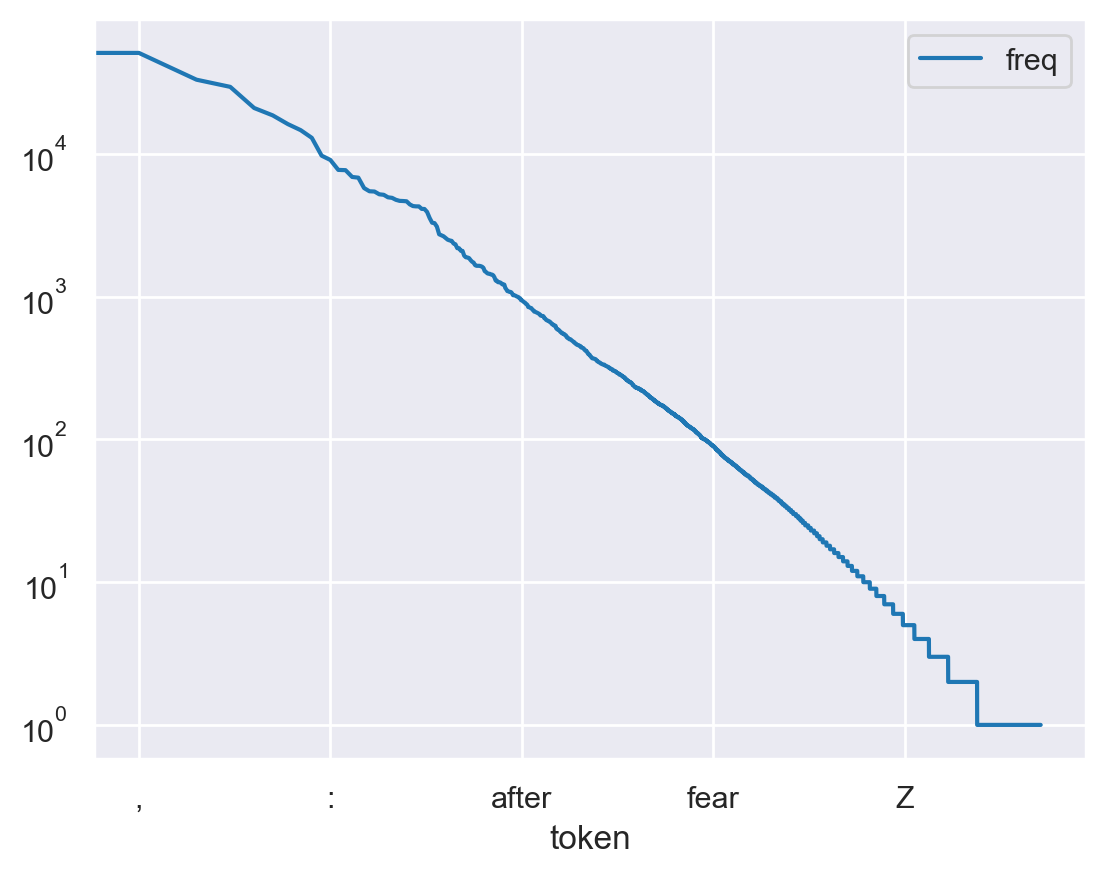

In [74]:
myth_tok_freq_df.plot(loglog=True)
plt.show()

In [ ]:
# len_freq_df.woodworking.sort_values(ascending=False).plot(loglog=True, style=".")
# plt.ylabel("frequency")
# plt.show()

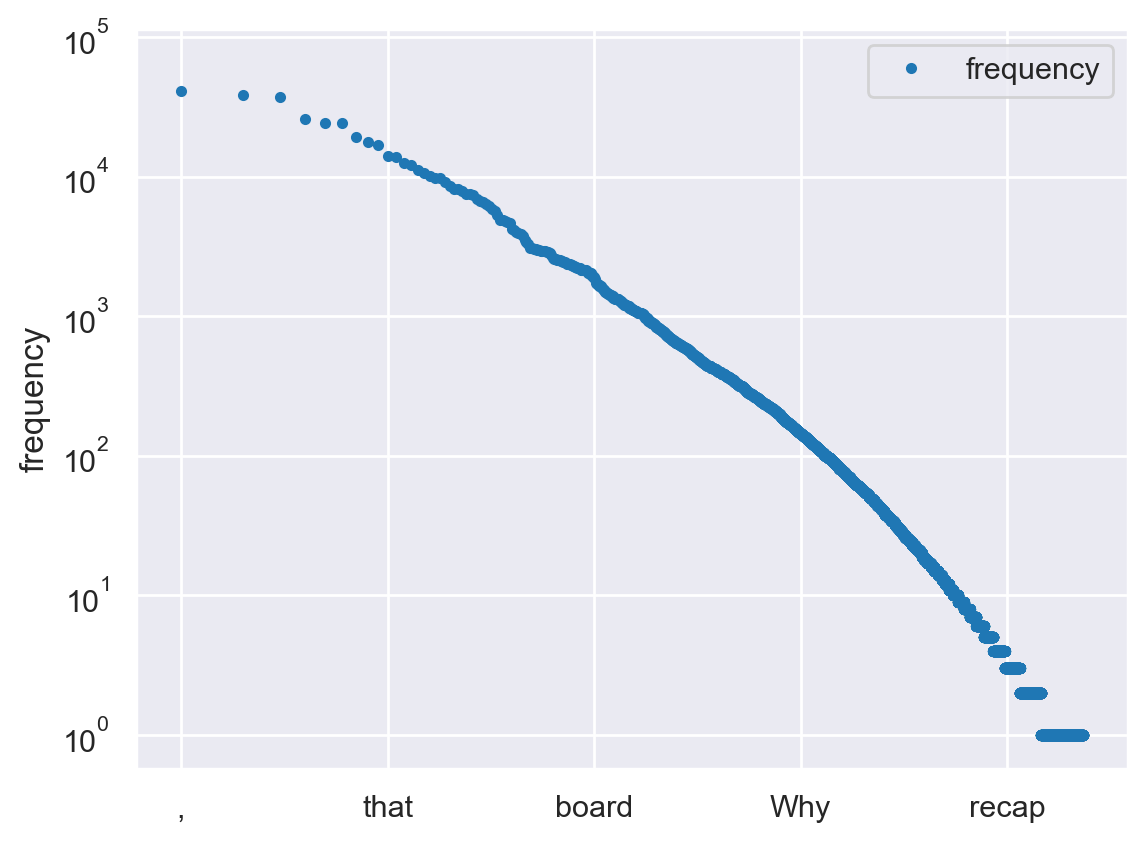

In [75]:
#len_freq_df.woodworking.sort_values(ascending=False).plot(loglog=True, style=".")
wood_len_freqs = len_freq_df.loc['woodworking','freq_count']

sorted_freq_count = sorted(wood_len_freqs.items(), key=lambda item: item[1], reverse=True)
pd.DataFrame.from_dict(dict(sorted_freq_count),orient='index',columns=['frequency']).plot(loglog=True, style=".")
plt.ylabel("frequency")
plt.show()

### Wow! How straight is that!

- Explain why there are: `,: after fear Z?`

Firstly, by default, Matplotlib automatically selects a subset of labels to display. This is done to prevent the labels from becoming overly dense on the coordinate axis, which could make the chart difficult to read.
\
Secondly, from the frequency of occurrence of words (or punctuation marks) in mythology obtained earlier, we can see that the two most frequent occurrences are ‘the’ and ‘,’, and the frequencies of the two are almost the same. Among them, ‘,’ is 51118, ':' is 9089 times, 'after' is 944 times, 'fear' is 90 times, and 'Z' is 5 times. The frequency of ',' is close to ten times that of 'after', and 'after' is close to ten times that of 'fear'. Then calculated by the 'loglog' function, it conforms to zipf's law

#### 🚧 TODO: Now let's process the length distribution for every corpus

In [ ]:
# all_token_freqs_df = ...

In [77]:
all_token_freqs_dict={}
for category, category_dict in len_freq_df.freq_count.items():
    for key, value in category_dict.items():
        if key in all_token_freqs_dict:
            all_token_freqs_dict[key] += value
        else:
            all_token_freqs_dict[key] = value
all_token_freqs_df = pd.DataFrame.from_dict(all_token_freqs_dict,orient='index',columns=['freq']).sort_values(by='freq',ascending=False)
all_token_freqs_df

,freq
",",331196
the,312496
of,167956
to,155559
a,153713
...,...
Drehung,1
Standpunkt,1
homogener,1
unitäre,1


In [ ]:
# all_token_freqs_df.plot(loglog=True)
# plt.show()

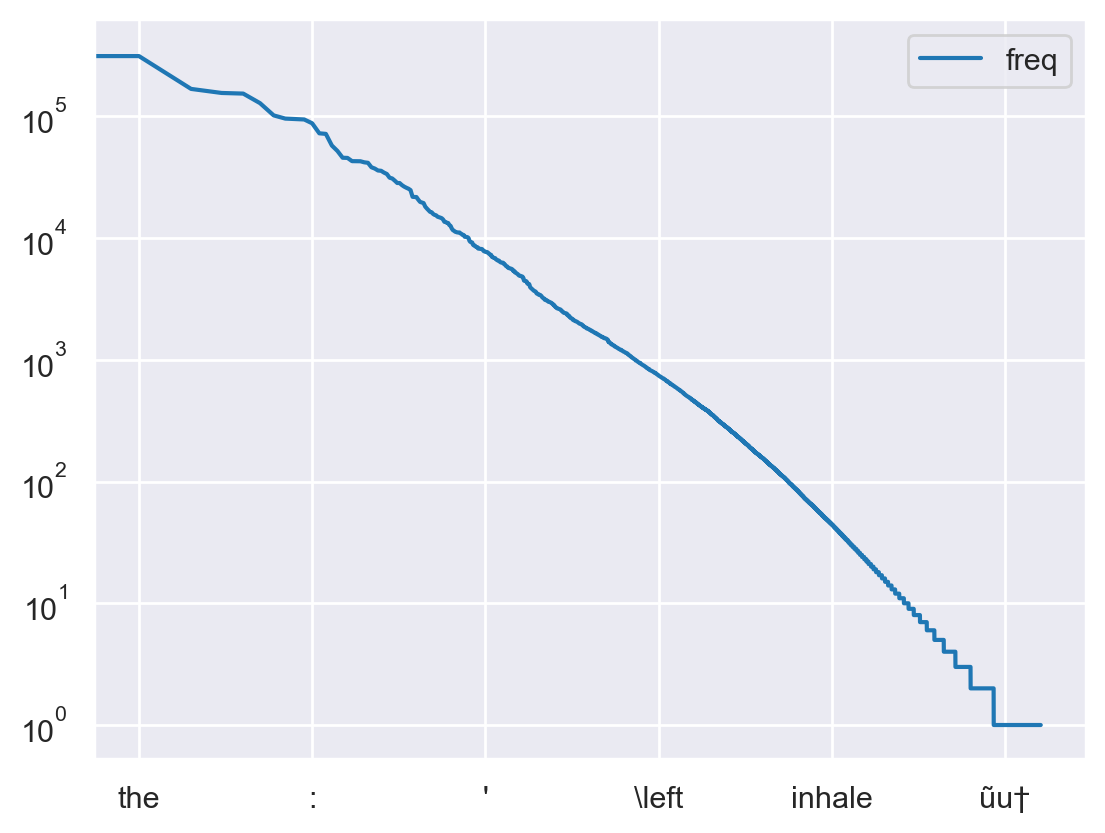

In [78]:
all_token_freqs_df.plot(loglog=True)
plt.show()

#### 🚧 TODO: Do length frequency follow Zipf's law?

Explain the graph results below and possibly fix them

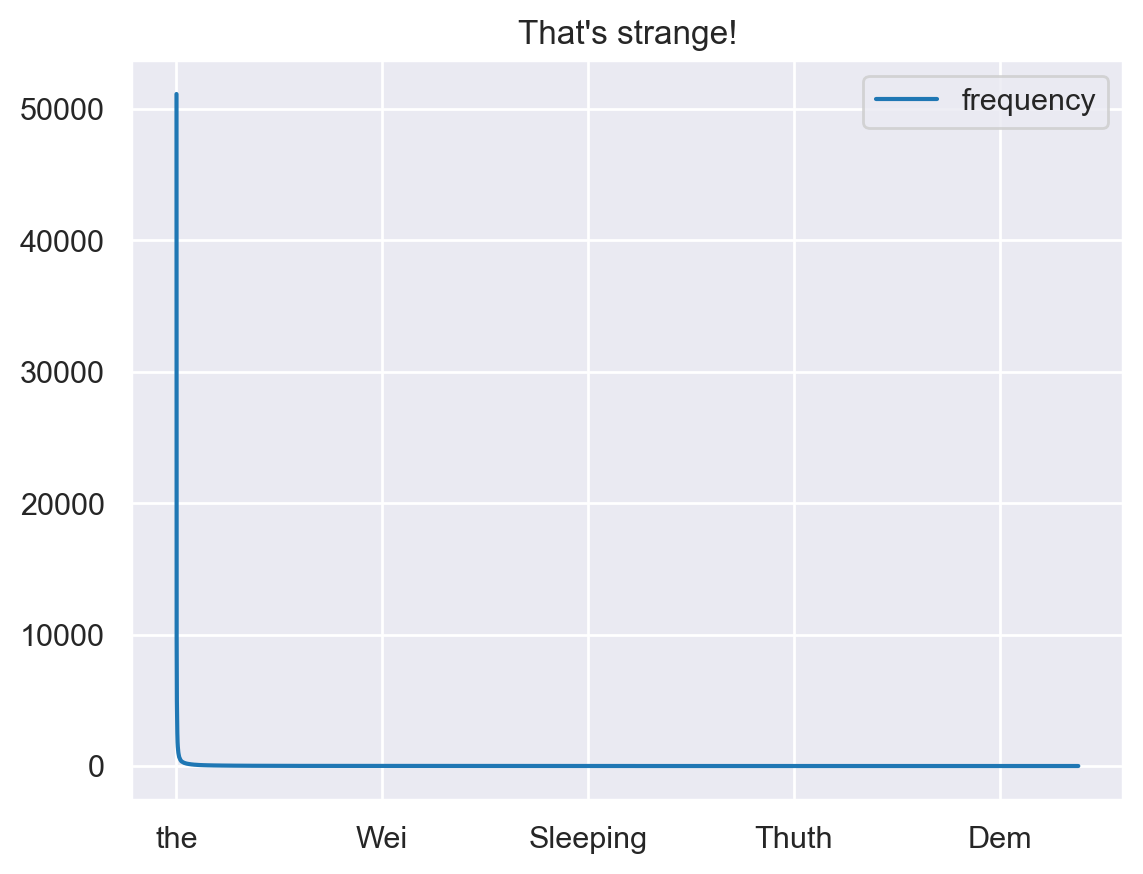

In [79]:
#myth_len_freqs = len_freq_df.mythology.sort_values(ascending=False)

myth_len_freqs = len_freq_df.loc['mythology','freq_count'].items()
sorted_freq_count = sorted(myth_len_freqs, key=lambda item: item[1], reverse=True)
myth_len_freqs = pd.DataFrame.from_dict(dict(sorted_freq_count),orient='index',columns=['frequency'])
myth_len_freqs.plot(title="That's strange!")
plt.show()

**Explain the graph results:**
\
Following Zipf'law, it is usually found that the most common word occurs approximately twice as often as the next common one, three times as often as the third most common, and so on. We can see that the frequency in the image exhibits an 'L' shape, typically expected to form a curve from the top left to the bottom right corner. The pronounced 'L' shape in the graph is primarily due to the significantly high frequency of words located towards the beginning of the horizontal axis. Moreover, a substantial portion of the entire set of words is represented by those with comparatively fewer occurrences.


**Fix it!**
\
Use 'loglog' function

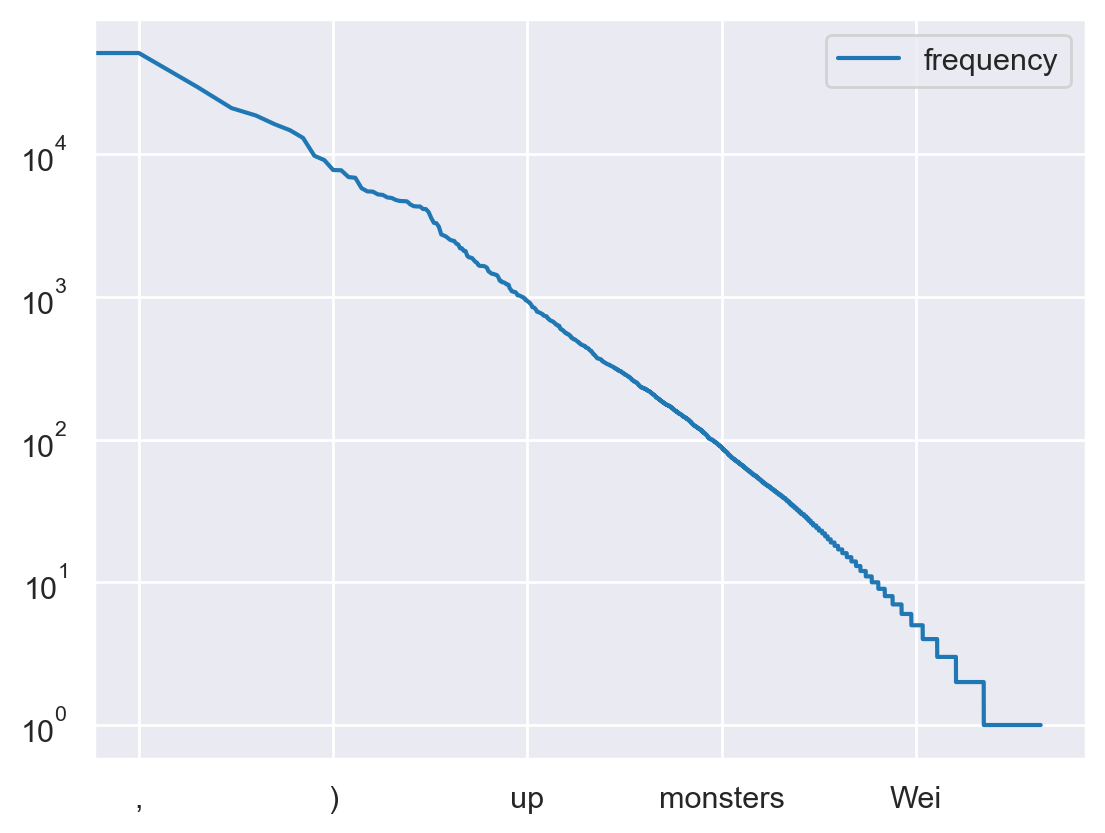

In [86]:
myth_len_freqs.plot(loglog=True)
plt.show()

#### 🚧 TODO: How to compute richness in words? How to compute the type/token ratio? Who will win this time?

In [81]:
# df["token_type_ratio"] = ...
df['token_type_ratio']=df['types_n']/df['tokens_n']
df.sort_values(by='token_type_ratio',ascending=False)

## In this time, the type/token ratio of portuguese is best.

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000,tokens,tokens_n,types_n,avg_wordsize,token_type_ratio
corpus,,,,,,,,,,,,
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437,9.90e-05,55,"[Q, :, Qual, a, origem, da, expressão, ``, o, ...",907253,60276,4.87,0.07
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51,"[Q, :, Can, anyone, identify, what, Chinese, m...",942611,51243,4.97,0.05
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524,7.12e-05,50,"[Q, :, When, and, why, did, people, stopped, u...",1445136,62465,5.10,0.04
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291,3.18e-05,57,"[Q, :, Help, reading, an, eyeglass, prescripti...",1714930,66007,5.33,0.04
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189,2.61e-05,63,"[Q, :, How, is, this, torque, value, arrived, ...",1526918,53823,4.75,0.04
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49,"[Q, :, Glue-up, for, butcher, block-style, cou...",1390534,32316,4.84,0.02


### What happened to Portuguese? Explain!

Make a type/token ration growth plot. Explain the obtained order!

In [82]:
word_types = df.tokens.progress_map(
    lambda x: batch_counts(x, max_len=df.tokens_n.min(), hop=10_000)
)
#dict(zip(word_types.index, word_types.values))
#print(np.shape(word_types[0]))

  0%|          | 0/6 [00:00<?, ?it/s]

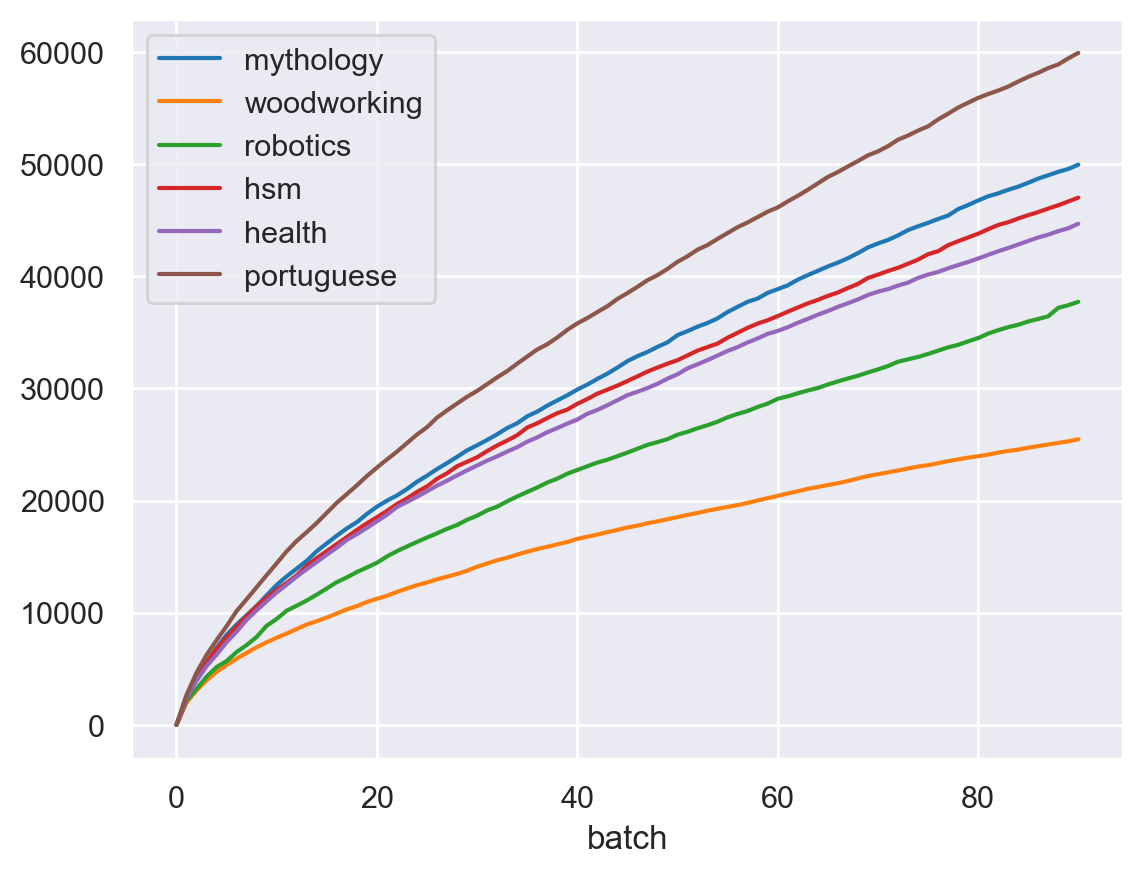

,mythology,woodworking,robotics,hsm,health,portuguese
batch,,,,,,
0,0,0,0,0,0,0
1,2534,1985,2140,2330,2403,2673
2,4169,3085,3200,4259,3923,4654
3,5532,3976,4295,5560,5236,6238
4,6859,4727,5157,6767,6273,7551
...,...,...,...,...,...,...
86,48715,24855,36197,45728,43468,58151
87,49014,25005,36442,46043,43714,58569
88,49320,25145,37190,46341,44032,58895


In [83]:
word_type_df = pd.DataFrame(dict(zip(word_types.index, word_types.values)))
word_type_df.index.name = "batch"
word_type_df.plot()
plt.show()

word_type_df

**Explain the obtained order:**
\
As the batch size increases, the type/token ratio also increases. The type/token ratios of portuguese are always the biggest compared with others.

### Percentage of new words

In [ ]:
# ...

# word_type_token_df.plot()
# plt.show()

# word_type_token_df

    mythology  woodworking  robotics     hsm  health  portuguese
0      100.00       100.00    100.00  100.00  100.00      100.00
1       39.22        35.66     33.12   45.29   38.75       42.57
2       24.64        22.41     25.49   23.40   25.08       25.39
3       19.35        15.89     16.72   17.84   16.53       17.39
4       14.55        11.43      9.42   13.17   14.95       14.20
..        ...          ...       ...     ...     ...         ...
85       0.76         0.54      0.62    0.60    0.72        0.63
86       0.61         0.60      0.67    0.68    0.56        0.71
87       0.62         0.56      2.01    0.64    0.72        0.55
88       0.50         0.56      0.63    0.71    0.57        0.91
89       0.78         0.71      0.81    0.74    0.90        0.81

[90 rows x 6 columns]


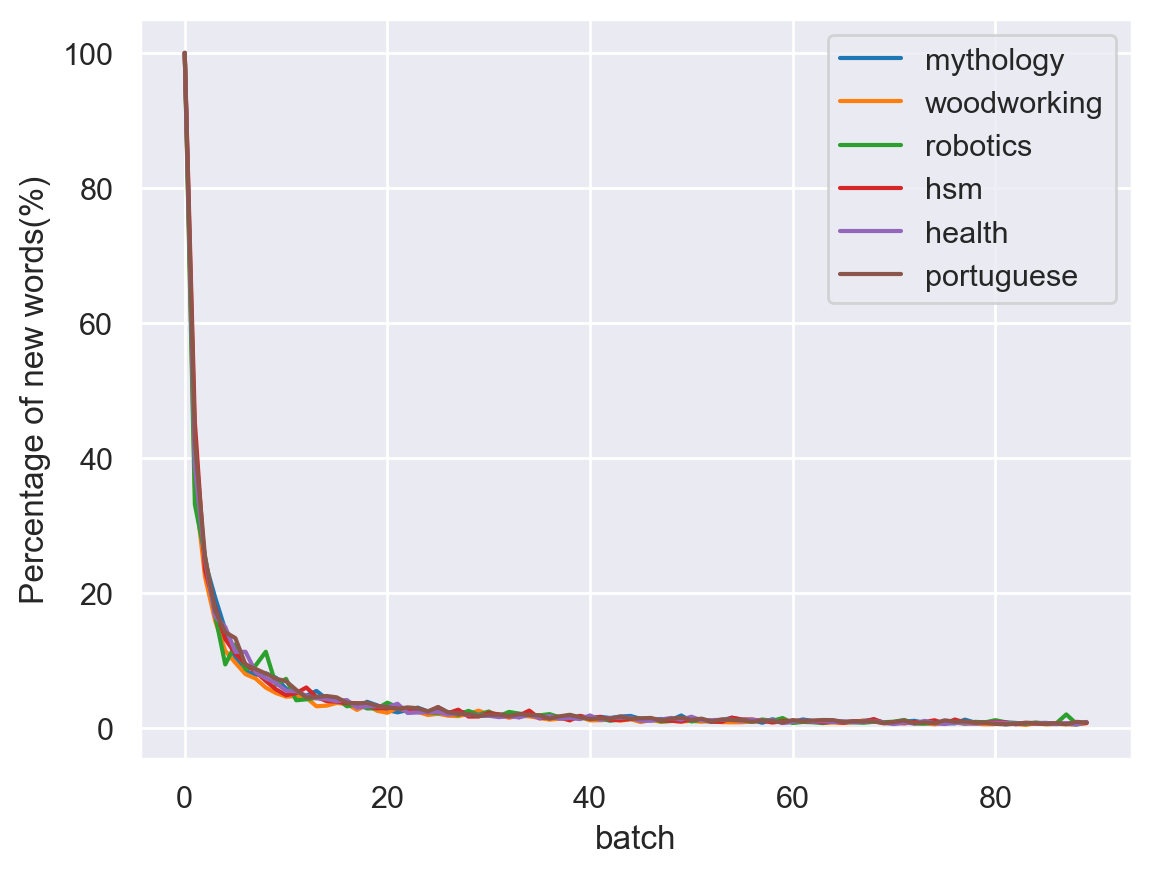

In [85]:
import warnings
# ignorer the warnings FutureWarning, a cause de frame.append
warnings.filterwarnings("ignore", category=FutureWarning)
word_type_ratio_df = pd.DataFrame()
# Calculate the proportion of new words added to each block
for batch in range(1, len(word_type_df)):
    # Count the number of new words
    new_words = word_type_df.iloc[batch] - word_type_df.iloc[batch - 1]
    
    # Calculate the proportion of new words (divide the number of new words by the total number of words)
    ratio = new_words / word_type_df.iloc[batch]*100
    
    # Add the result to the new data framework
    #word_type_ratio_df = word_type_ratio_df.append(ratio, ignore_index=True)
    word_type_ratio_df = pd.concat([word_type_ratio_df, pd.DataFrame([ratio])], ignore_index=True)

# Print the proportion of new words added to each block
print(word_type_ratio_df)
word_type_ratio_df.plot()
plt.ylabel("Percentage of new words(%)")
plt.xlabel("batch")
plt.show()

### Explain the percentage of new words: ###
**As the number of new words increased, the rate of new words used decreased, and most of the words were based on previous words, which were also found to conform to zipf's law through the image**